<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.5
## Feature Selection

### Data

**Predict the onset of diabetes based on diagnostic measures.**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database/download)

In [63]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


#### 1. Load Data

In [57]:
# Read Data
diabetes_csv = 'diabetes.csv'
df = pd.read_csv(diabetes_csv)

#### 2. Perform EDA

Perform EDA. Check Null Values. Impute if necessary.

In [51]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [7]:
df.info.

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [73]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


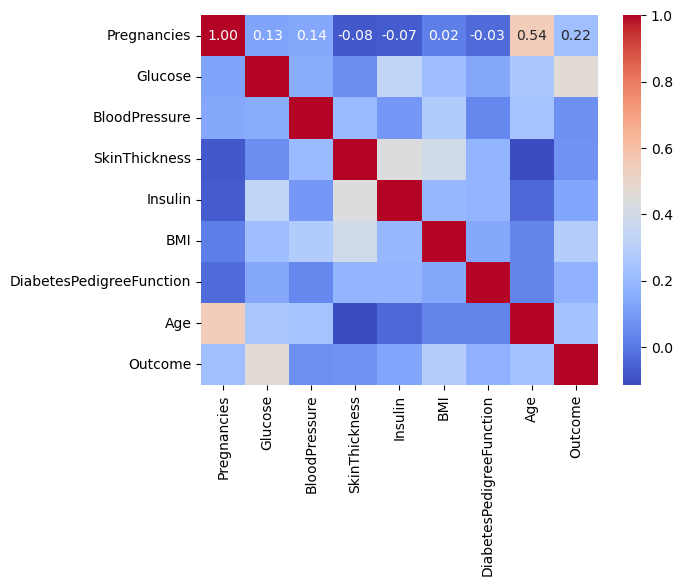

In [81]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

#### 3. Set Target

- Set `Outcome` as target.
- Set Features

In [85]:
# Prepare features and target variable
# Set target and features
target = 'Outcome'
features = df.drop(target, axis=1).columns

print("\nTarget variable:", target)
print("Features:", list(features))


Target variable: Outcome
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [89]:
x = df[features]
y = df[target]

In [91]:
print("Features shape:", x.shape)
print("Target shape:", y.shape)

Features shape: (768, 8)
Target shape: (768,)


#### 4. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 4.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y
- Find top 4 features
- Transform features to a DataFrame

In [97]:
# Create an instance of SelectKBest

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
# Univariate Selection
selector = SelectKBest(score_func=chi2, k=4)


#Fit 
selector.fit(X, y)

SelectKBest(k=4, score_func=<function chi2 at 0x0000025128E12660>)

In [105]:
scores = selector.scores_
print("Feature scores:", scores)

Feature scores: [ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]


In [107]:
scores = selector.scores_

# Get the feature names
feature_names = X.columns

# Create a DataFrame to display feature names and their scores
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores})

In [109]:
scores_df

,Feature,Score
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


In [111]:
# top 4 features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

print("\nTop 4 features selected:")
print(selected_features)


Top 4 features selected:
Index(['Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')


In [113]:
# Transform X to Features
X_selected=selector.transform(X)


In [115]:
X_selected.shape

(768, 4)

In [117]:
# Transform features to a dataframe
X_selected_df=pd.DataFrame(X_selected,columns=selected_features)

In [119]:
print(X_selected_df)

     Glucose  Insulin   BMI   Age
0      148.0      0.0  33.6  50.0
1       85.0      0.0  26.6  31.0
2      183.0      0.0  23.3  32.0
3       89.0     94.0  28.1  21.0
4      137.0    168.0  43.1  33.0
..       ...      ...   ...   ...
763    101.0    180.0  32.9  63.0
764    122.0      0.0  36.8  27.0
765    121.0    112.0  26.2  30.0
766    126.0      0.0  30.1  47.0
767     93.0      0.0  30.4  23.0

[768 rows x 4 columns]


##### 4.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [157]:
# ANSWER
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score


In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [125]:
estimator = LogisticRegression(max_iter=1000, random_state=42)


In [127]:
n_features_to_select = 4  # Number of features to select
rfe = RFE(estimator, n_features_to_select=n_features_to_select)

In [129]:
rfe.fit(X_scaled, y)

RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_features_to_select=4)

In [131]:
selected_features_mask = rfe.support_
selected_features = X.columns[selected_features_mask]


In [133]:
print("Selected features:", list(selected_features))

Selected features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']


In [135]:
print("Feature ranking:", rfe.ranking_)

Feature ranking: [1 1 2 5 4 1 1 3]


In [ ]:
# Print Score
# Find Features

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [145]:
X_train_selected = X_train[:, selected_features_mask]
X_test_selected = X_test[:, selected_features_mask]


In [147]:
# Train the Logistic Regression model on the selected features
estimator.fit(X_train_selected, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [149]:
# Make predictions on the test set
y_pred = estimator.predict(X_test_selected)

In [151]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [153]:
print("Selected features:", list(selected_features))
print("Model accuracy with selected features:", accuracy)

Selected features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
Model accuracy with selected features: 0.7619047619047619


In [159]:
X_selected = X_scaled[:, selected_features_mask]
cross_val_scores = cross_val_score(estimator, X_selected, y, cv=5, scoring='accuracy')


In [161]:
print("Selected features:", list(selected_features))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())

Selected features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
Cross-validation accuracy scores: [0.75974026 0.74675325 0.77922078 0.78431373 0.77777778]
Mean cross-validation accuracy: 0.7695611577964518




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



